In [1]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.io as sio
from scipy import stats
import glob
import os
import shutil
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [2]:
from behavioral_analysis_functions import perf_per_dir, beh_same_opp_quad
from constant_variables import *
from analysis_functions import *

# Setup

In [3]:
monkey = 'Stanton'

In [9]:
#brain_areas = ['MT', 'MST', 'LIP', 'SC']
brain_areas = ['MST', 'LIP', 'SC']

# path for merged  data files
datapath = 'E:\\two_boundary\\original_data\\' + monkey + '\\'

# stimulus directions
ord_ind = np.argsort(DIRS)
ord_dirs = [DIRS[i] for i in ord_ind]

# Plotting colors
color_cat1 = plot_colors['Category1']
color_cat2 = plot_colors['Category2']

# Inclusion Analysis

In [181]:
match_conds = [1,7,13,19,25,31,38,44,50,56,62,68, 2,8,14,20,26,32,37,43,49,55,61,67]
#define  and group match conditions
cond_test1_sameqd = [1,7,13,19,25,31,38,44,50,56,62,68]
cond_test1_oppqd = [2,8,14,20,26,32,37,43,49,55,61,67]

In [170]:
for i, area in enumerate(brain_areas):
    
    make_dirs('bad_beh')
    
    currpath = datapath + area
    os.chdir(currpath)

    filelist = [f for f in glob.glob("*_merged_w_ratings.mat")]
    
    n_files = len(filelist)
    
    for file in filelist:

        acc = np.zeros([2, N_DIRS])

        bhv = sio.loadmat(file)['data']['BHV']
        code_numbers = bhv[0][0][0][0][7][0]
        conditions = bhv[0][0][0][0][3][0]
        errors = bhv[0][0][0][0][5]
        dir_nums = [int(np.ceil(i/6))-1 for i in conditions]

        n_trials = len(errors)
        error_match_sameqd = []
        error_match_oppqd = []
        for i_trial in range(n_trials):
            if errors[i_trial] ==5 or errors[i_trial] == 6 or errors[i_trial]==0:
                if conditions[i_trial] in cond_test1_sameqd:
                    error_match_sameqd.append(errors[i_trial])
                if conditions[i_trial] in cond_test1_oppqd:
                    error_match_oppqd.append(errors[i_trial])

        #compute accuracies per session
        accuracy_sameqd = error_match_sameqd.count(0)/len(error_match_sameqd)
        accuracy_oppqd = error_match_oppqd.count(0)/len(error_match_oppqd)

        #ttest_pval = stats.ttest_ind(acc[0, 0:6]/acc[1, 0:6]*100, acc[0, 6:]/acc[1, 6:]*100)[1]

        if accuracy_sameqd < .75 or accuracy_oppqd < .75:

            shutil.move(file, 'bad_beh')
            print(file)
            print(accuracy_sameqd)        
            print(accuracy_oppqd)    
            #print(ttest_pval)    

stanton_20200617_1_merged_w_ratings.mat
0.5945945945945946
0.6030534351145038
stanton_20200630_3_merged_w_ratings.mat
0.45588235294117646
0.3670886075949367


In [128]:
for i, area in enumerate(brain_areas):
    
    make_dirs('bad_beh')
    
    currpath = datapath + area
    os.chdir(currpath)

    filelist = [f for f in glob.glob("*_merged_w_ratings.mat")]
    
    n_files = len(filelist)
    
    for file in filelist:

        acc = np.zeros([2, N_DIRS])

        bhv = sio.loadmat(file)['data']['BHV']
        code_numbers = bhv[0][0][0][0][7][0]
        conditions = bhv[0][0][0][0][3][0]
        errors = bhv[0][0][0][0][5]
        dir_nums = [int(np.ceil(i/6))-1 for i in conditions]

        n_trials = len(errors)

        for i_trial in range(n_trials):
            if code_numbers[i_trial][1][0] != MS_STIM_ON and conditions[i_trial] <= 72:# and conditions[i_trial] in match_conds:
                if errors[i_trial] == 0:
                    acc[0, dir_nums[i_trial]] += 1
                if errors[i_trial] == 0 or errors[i_trial] == 6 or errors[i_trial] == 5:
                    acc[1, dir_nums[i_trial]] += 1

        cat1_mean_acc = np.mean(acc[0, 0:6]/acc[1, 0:6]*100)
        cat2_mean_acc = np.mean(acc[0, 6:]/acc[1, 6:]*100)

        ttest_pval = stats.ttest_ind(acc[0, 0:6]/acc[1, 0:6]*100, acc[0, 6:]/acc[1, 6:]*100)[1]

        if cat1_mean_acc < 70 or cat2_mean_acc < 70 or ttest_pval < 0.01:

            #shutil.move(file, 'bad_beh')
            print(file)
            print(cat1_mean_acc)        
            print(cat2_mean_acc)    
            print(ttest_pval)    

neville_20191015_2_merged_w_ratings.mat
73.60150843565386
93.29171395734863
0.005163900279596808
neville_20200501_1_merged_w_ratings.mat
65.76927170317975
98.1628787878788
6.877718603473231e-06
neville_20190812_1_merged_w_ratings.mat
83.1788127019392
94.33608635265956
0.007334397461088082
neville_20180730_1_merged_w_ratings.mat
63.494302700593984
68.77710497197437
0.34814881672556086
neville_20180823_1_merged_w_ratings.mat
68.51285705062958
68.42422964450174
0.9847534005785485
neville_20180925_1_merged_w_ratings.mat
94.69356429420195
64.10459885042425
0.00037748201232973684
neville_20180926_1_merged_w_ratings.mat
93.53542535272948
75.8102628543358
0.001810365955094934


In [105]:
n_files = len(filelist)

# Pre-allocate to store  accuracy per direction directions for each file
acc_all = [np.zeros([N_DIRS]) for i in range(1)]

for i_file, file in enumerate(filelist[0:1]):

    acc = np.zeros([2, N_DIRS])

    bhv = sio.loadmat(file)['data']['BHV']
    code_numbers = bhv[0][0][0][0][7][0]
    conditions = bhv[0][0][0][0][3][0]
    errors = bhv[0][0][0][0][5]
    dir_nums = [int(np.ceil(i/6))-1 for i in conditions]

    n_trials = len(errors)

    for i_trial in range(n_trials):
        if code_numbers[i_trial][1][0] != MS_STIM_ON and conditions[i_trial] != PV_COND and conditions[i_trial] in match_conds:
            if errors[i_trial] == 0:
                acc[0, dir_nums[i_trial]] += 1
                acc[1, dir_nums[i_trial]] += 1
            elif errors[i_trial] == 6:
                acc[1, dir_nums[i_trial]] += 1

    acc_all[i_file] = acc[0]/acc[1]*100

acc_mean = np.mean(acc_all, 0)
acc_std = np.std(acc_all, 0)

acc_mean = [x for _,x in sorted(zip(DIRS, acc_mean))]
acc_std = [x for _,x in sorted(zip(DIRS, acc_std))]


<BarContainer object of 12 artists>

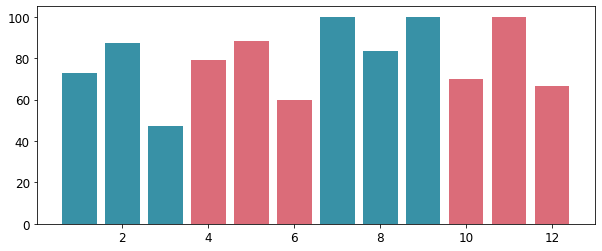

In [82]:
colors = [color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2, color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2]
plt.bar(range(1, 13), acc_mean,  yerr = acc_std, align='center', color = colors)

# Analysis

In [16]:
acc_mean_per_area = [[] for i in range(len(brain_areas))]
acc_std_per_area = [[] for i in range(len(brain_areas))]
acc_whisker_per_area = [[] for i in range(len(brain_areas))]

acc_all_areas_bar = []
acc_all_areas_whisker = []


for i, area in enumerate(brain_areas):
    
    currpath = datapath + area
    os.chdir(currpath)

    filelist = [f for f in glob.glob("*_merged_w_ratings.mat")]
    
    # For bar plot
    [acc, acc_mean, acc_std] = perf_per_dir(filelist)
    
    acc_mean_per_area[i] = acc_mean
    acc_std_per_area[i] = acc_std
    acc_all_areas_bar.append(acc)

    
    # For whisker plot
    acc = beh_same_opp_quad(filelist)
    acc = [i*100 for i in acc]
    
    acc_whisker_per_area[i] = np.squeeze(acc)
    
    if len(acc_all_areas_whisker) == 0:
        acc_all_areas_whisker = np.squeeze(acc)
    else:
        acc_all_areas_whisker = np.concatenate([acc_all_areas_whisker, np.squeeze(acc)], 1)
        
acc_all_areas_bar = np.vstack(acc_all_areas_bar)
acc_mean = [np.mean(acc_all_areas_bar, 0)[i] for i in ord_ind]
acc_std = [np.std(acc_all_areas_bar, 0)[i] for i in ord_ind]


# Plotting

## Performance per area


### Bar plot

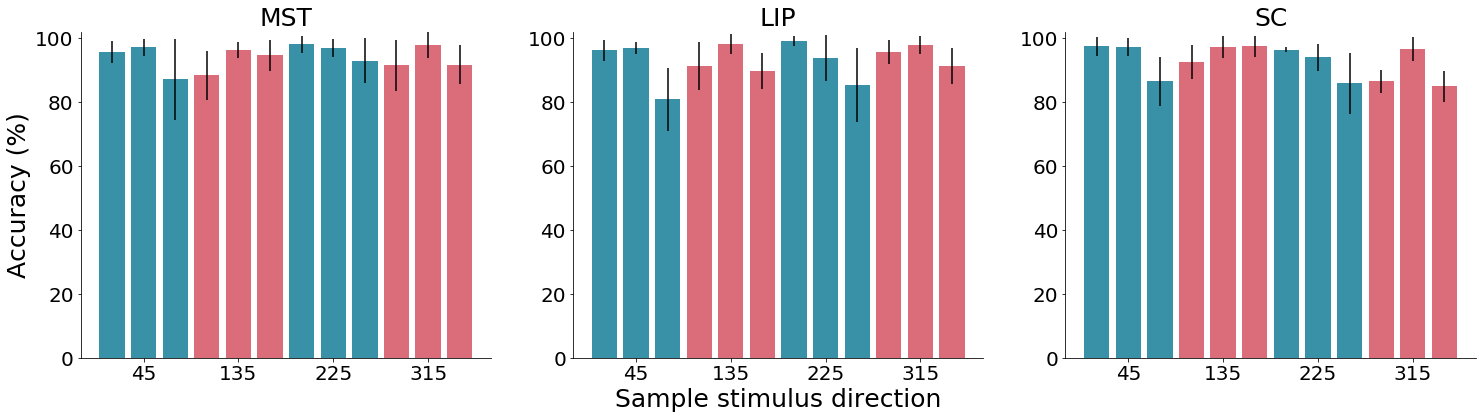

In [17]:
xtick_dirs = [ord_dirs[i] for i in np.arange(1, 11, 3)]

fig, ax =  plt.subplots(1, 3, figsize=(25, 6))

colors = [color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2, color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2]

for i in range(3):
    ax[i].bar(range(1, 13), acc_mean_per_area[i],  yerr = acc_std_per_area[i], align='center', color = colors)
    ax[i].set_title(brain_areas[i], fontsize = 25)
    ax[i].set_ylim(0, 102)
    ax[i].set_xticks(np.arange(2, 12, 3))
    ax[i].set(xticklabels = xtick_dirs)

ax[1].set_xlabel('Sample stimulus direction', fontsize = 25)
ax[0].set_ylabel('Accuracy (%)', fontsize = 25)

# Hide the right and top spines
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].tick_params(labelsize=20)
    #ax[i].set_ylim(0, 0.0016)
    #ax[i].set_xticks(np.arange(-0.2, 0.21, 0.1))

plt.show()

for i in save_filetype:
    fname = 'E:\\two_boundary\\figures\\behavior\\beh_' + monkey + '_per_area_bar.' + i
    #fig.savefig(fname, bbox_inches='tight')


### Whisker plot

In [15]:
acc_whisker_per_area

[array([[91.17647059, 91.        , 89.24731183, 87.34177215, 91.25      ,
         90.4109589 , 79.26829268, 90.32258065, 80.3030303 , 82.14285714,
         83.76068376, 93.15068493, 86.9047619 , 96.        , 87.90322581],
        [83.52941176, 90.        , 92.55319149, 85.71428571, 93.67088608,
         94.11764706, 80.95238095, 96.05263158, 83.13253012, 88.88888889,
         88.33333333, 86.25      , 90.24390244, 97.22222222, 88.98305085]]),
 array([[88.60759494, 84.26966292, 88.02816901, 82.41758242, 81.11111111,
         91.17647059, 88.29787234, 93.97590361, 81.39534884, 85.05747126,
         93.15068493],
        [80.95238095, 90.4109589 , 92.10526316, 86.9047619 , 82.41758242,
         83.11688312, 86.15384615, 91.56626506, 85.56701031, 86.51685393,
         88.52459016]]),
 array([[85.07462687, 87.5       , 91.66666667, 91.78082192, 75.86206897],
        [85.        , 88.23529412, 84.44444444, 89.32038835, 82.43243243]])]

In [18]:
ttest_pvals = np.zeros(3)

for i in range(3):
    ttest_pvals[i] = stats.ttest_ind(acc_whisker_per_area[i][0], acc_whisker_per_area[i][1])[1]

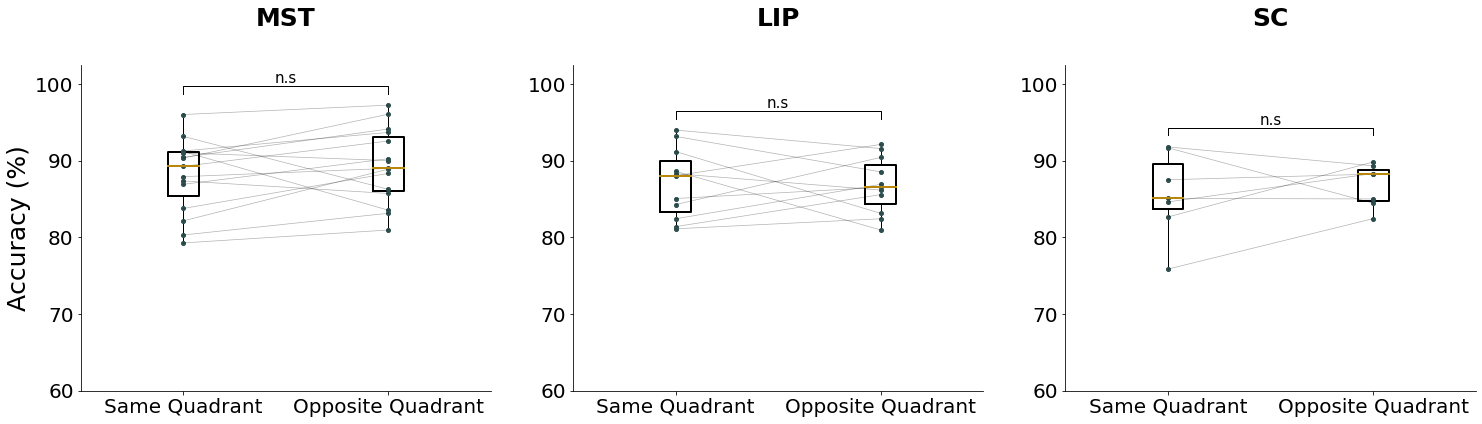

In [19]:
x_labels = ['Same Quadrant','Opposite Quadrant']
boxprops = dict(linewidth = 2, color = 'k')
medianprops = dict(linewidth=2, color='darkgoldenrod')

fig, ax =  plt.subplots(1, 3, figsize=(25, 6))
x1, x2 = 1, 2

for i in range(3):
    ax[i].boxplot([[ii for ii in acc_whisker_per_area[i][0]], [ii for ii in acc_whisker_per_area[i][1]]], labels = x_labels, showcaps = False, boxprops=boxprops, medianprops=medianprops)
    ax[i].set_title(brain_areas[i], fontsize = 25, y = 1.1, fontweight = 'bold')
    ax[i].set_ylim(60, 102.5)
    
    if ttest_pvals[i] > 0.05:
        sigtext = 'n.s'
    elif ttest_pvals[i] <= 0.05 and pvals_dir[i] > 0.01:
        sigtext = '*'                 
    elif ttest_pvals[i] <= 0.01 and pvals_dir[i] > 0.005:
        sigtext = '**'      
    elif ttest_pvals[i] <= 0.005 and pvals_dir[i] > 0.005:
        sigtext = '***'  
    else:
        sigtext = '****'      
                          
    y, h, col = np.max(acc_whisker_per_area[i]) + 1.5, 1, 'k'
    ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[i].text((x1+x2)*.5, y+h, sigtext, ha='center', va='bottom', color=col, fontsize = 15)
    
    for ii in range(np.size(acc_whisker_per_area[i], 1)):
        ax[i].plot (1, acc_whisker_per_area[i][0][ii],  'o', color = 'darkslategrey', markersize = 4)
        ax[i].plot (2, acc_whisker_per_area[i][1][ii], 'o', color = 'darkslategrey', markersize = 4)
        ax[i].plot([1,2], [acc_whisker_per_area[i][0][ii],acc_whisker_per_area[i][1][ii]],  lw = 0.7, color = 'black', alpha = 0.3)

#ax[1].set_xlabel('Sample and test stimulus', fontsize = 25)
ax[0].set_ylabel('Accuracy (%)', fontsize = 25)

# Hide the right and top spines
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].tick_params(labelsize=20)
    #ax[i].set_ylim(0, 0.0016)
    #ax[i].set_xticks(np.arange(-0.2, 0.21, 0.1))

plt.show()

for i in save_filetype:
    fname = 'E:\\two_boundary\\figures\\behavior\\beh_' + monkey + '_per_area_whisker.' + i
    #fig.savefig(fname, bbox_inches='tight')


## Performance across areas (combined)


### Bar plot

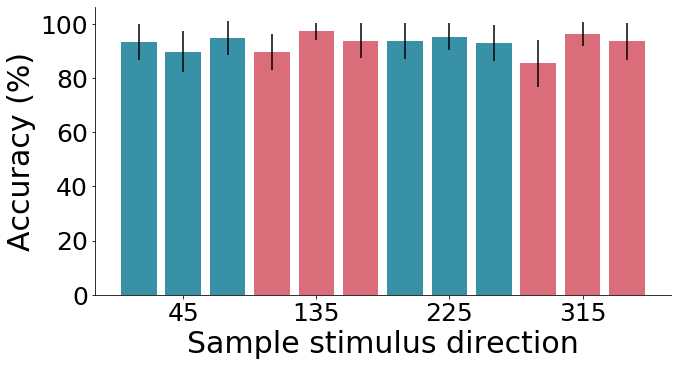

In [186]:
## PLOTTING
xtick_dirs = [ord_dirs[i] for i in np.arange(1, 11, 3)]
colors = [color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2, color_cat1, color_cat1, color_cat1, color_cat2, color_cat2, color_cat2]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1,1,1,1])

ax.bar(range(1, 13), acc_mean, yerr = acc_std, align='center', color = colors)

ax.set_xlabel('Sample stimulus direction', fontsize = 30)
ax.set_ylabel('Accuracy (%)', fontsize = 30)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(2, 12, 3))
ax.set(xticklabels = xtick_dirs)


plt.show()

for i in save_filetype:
    fname = 'E:\\two_boundary\\figures\\behavior\\beh_' + monkey + '_all_areas_bar.' + i
    fig.savefig(fname, bbox_inches='tight')


### Whiker plot

In [187]:
pval = stats.ttest_ind(acc_all_areas_whisker[0], acc_all_areas_whisker[1])[1]

In [188]:
boxprops = dict(linewidth = 2, color = 'k')
medianprops = dict(linewidth=2, color='darkgoldenrod')

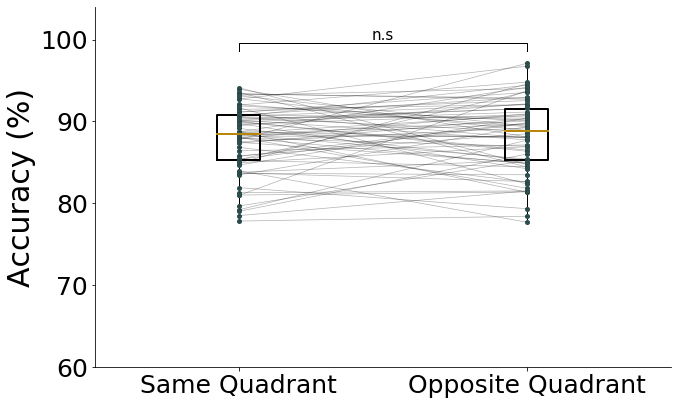

In [189]:
x_labels = ['Same Quadrant','Opposite Quadrant']

## PLOTTING

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([1,1,1,1])

plt.boxplot([[i for i in acc_all_areas_whisker[0]], [i for i in acc_all_areas_whisker[1]]], labels = x_labels, showcaps = False, boxprops=boxprops, medianprops=medianprops)

plt.ylim(60, 104)
#plt.title('Opposite vs Within Quadrant Accuracy {}'.format(area))

for i in range(np.size(acc_all_areas_whisker, 1)):
    plt.plot (1, acc_all_areas_whisker[0][i],  'o', color = 'darkslategrey', markersize = 4)
    plt.plot (2, acc_all_areas_whisker[1][i], 'o', color = 'darkslategrey', markersize = 4)
    plt.plot([1,2], [acc_all_areas_whisker[0][i],acc_all_areas_whisker[1][i]],  lw = 0.7, color = 'black', alpha = 0.3)
    
if pval > 0.05:
    sigtext = 'n.s'
elif pval <= 0.05 and pvals_dir[i] > 0.01:
    sigtext = '*'                 
elif pval <= 0.01 and pvals_dir[i] > 0.005:
    sigtext = '**'      
elif pval <= 0.005 and pvals_dir[i] > 0.005:
    sigtext = '***'  
else:
    sigtext = '****'      

y, h, col = np.max(acc_all_areas_whisker) + 1.5, 1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text((x1+x2)*.5, y+h, sigtext, ha='center', va='bottom', color=col, fontsize = 15)
    
ax.set_ylabel('Accuracy (%)', fontsize = 30)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(60, 101, 10))

plt.show()
for i in save_filetype:
    fname = 'E:\\two_boundary\\figures\\behavior\\beh_' + monkey + '_all_areas_whisker.' + i
    fig.savefig(fname, bbox_inches='tight')
